In [1]:
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')

from __init__ import *
from __init__jupyterlab import *

import snmcseq_utils

In [2]:
# my clusters
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_fig4_scf_clusterings.tsv'
df_scf = pd.read_csv(f, sep='\t', index_col=0)
df_scf['cell_id'] = df_scf.index.values
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_fig4_scf_annotation.tsv'
df_scf_annot = pd.read_csv(f, sep='\t', index_col='cluster_id_iterative')
print(df_scf.shape)
df_scf.head()

(408885, 11)


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,joint_embedding_x,joint_embedding_y,modality,modality_name,single_modality_cluster,single_modality_annot,joint_cluster_round1,joint_cluster_round2,joint_cluster_round3,joint_cluster_round4,cell_id
sample,,,,,,,,,,,
snmcseq_gene_2C_M_0,0.471629,-3.134735,snmcseq_gene,DNA methylation,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb_Rorb-Tenm2,1,1-1,1-1-1,1-1-1-1,snmcseq_gene_2C_M_0
snmcseq_gene_2C_M_1,-2.414973,-12.098081,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1,snmcseq_gene_2C_M_1
snmcseq_gene_2C_M_100,-1.446751,-12.051894,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1,snmcseq_gene_2C_M_100
snmcseq_gene_2C_M_1000,-1.901734,-13.660591,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1,snmcseq_gene_2C_M_1000
snmcseq_gene_2C_M_1001,-0.981086,-11.936621,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1,snmcseq_gene_2C_M_1001


In [3]:
print(df_scf_annot.shape)
df_scf_annot.head()

(56, 2)


,annotation_curated,color
cluster_id_iterative,,
1-1-1,L4/5 IT (1),#3CBC78
1-2-1,L4/5 IT (2),#3CBC45
1-2-2,L4/5 IT (3),#5DDB65
2-1-1,L6 CT Cpa6 (1),#338C5E
2-1-2,L6 CT Cpa6 (2),#338C5E


In [4]:
def remove_dataset_header(cell_name):
    """
    """
    datasets = [
        '10x_nuclei_v3_macosko', # this is important: 10x_nuclei_v3_macosko has to come first
        '10x_nuclei_v3',
        'smarter_cells', 
        'smarter_nuclei',
        '10x_cells_v2', 
        '10x_cells_v3', 
        '10x_nuclei_v2',
        'snmcseq_gene',
        'snatac_gene',
        ]
    for dataset in datasets:
        if cell_name.startswith(dataset):
            cell_name_new = cell_name[len(dataset)+1:]
            return cell_name_new
    return cell_name

In [5]:
df_scf['cell'] = df_scf['cell_id'].apply(remove_dataset_header)
print(df_scf.shape)
df_scf.head()

(408885, 12)


,joint_embedding_x,joint_embedding_y,modality,modality_name,single_modality_cluster,single_modality_annot,joint_cluster_round1,joint_cluster_round2,joint_cluster_round3,joint_cluster_round4,cell_id,cell
sample,,,,,,,,,,,,
snmcseq_gene_2C_M_0,0.471629,-3.134735,snmcseq_gene,DNA methylation,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb_Rorb-Tenm2,1,1-1,1-1-1,1-1-1-1,snmcseq_gene_2C_M_0,2C_M_0
snmcseq_gene_2C_M_1,-2.414973,-12.098081,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1,snmcseq_gene_2C_M_1,2C_M_1
snmcseq_gene_2C_M_100,-1.446751,-12.051894,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1,snmcseq_gene_2C_M_100,2C_M_100
snmcseq_gene_2C_M_1000,-1.901734,-13.660591,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1,snmcseq_gene_2C_M_1000,2C_M_1000
snmcseq_gene_2C_M_1001,-0.981086,-11.936621,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1,snmcseq_gene_2C_M_1001,2C_M_1001


In [6]:
# zizhen clusters
f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/cluster.membership.csv'
df_rna = pd.read_csv(f, index_col=0)
f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/cluster.annotation.csv'
df_rna_annot = pd.read_csv(f, index_col=0)

print(df_rna.shape, df_rna_annot.shape)
df_rna_annot.head()

(482712, 1) (116, 12)


,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,cl,cluster_size,size,tree_order
cluster_id,,,,,,,,,,,,
1,Lamp5 Pax6,#DDACC9,1,Lamp5,#DA808C,1,GABAergic,#F05A28,1,700,700,1
2,Lamp5 Egln3_1,#FF88AD,1,Lamp5,#DA808C,1,GABAergic,#F05A28,2,618,618,2
3,Lamp5 Egln3_2,#DD8091,1,Lamp5,#DA808C,1,GABAergic,#F05A28,3,814,814,3
4,Lamp5 Egln3_3,#F08E98,1,Lamp5,#DA808C,1,GABAergic,#F05A28,4,1276,1276,4
5,Lamp5 Pdlim5_1,#FF7290,1,Lamp5,#DA808C,1,GABAergic,#F05A28,5,1288,1288,5


In [7]:
# filter by neuronal cells and datasets
neuronal_clsts = df_rna_annot.loc[df_rna_annot['class_label']!='Non-Neuronal', 'cl'].values
df_rna = df_rna[df_rna['x'].isin(neuronal_clsts)]
df_rna = df_rna[~df_rna.index.str.contains(r'^10X_nuclei_v2_AIBS.')]
print(df_rna.shape)

(294332, 1)


In [8]:
df_rna['modality_allen'] = df_rna.reset_index()['index'].apply(lambda x: x.split('.')[0]).values
df_rna['cell'] = df_rna.reset_index()['index'].apply(lambda x: x.split('.')[1]).values
modality_map = {
    'SmartSeq_cells_AIBS': 'smarter_cells', 
    'SmartSeq_nuclei_AIBS': 'smarter_nuclei',
    '10X_cells_v2_AIBS': '10x_cells_v2', 
    '10X_cells_v3_AIBS': '10x_cells_v3', 
    '10X_nuclei_v3_AIBS': '10x_nuclei_v3',
    '10X_nuclei_v3_Broad': '10x_nuclei_v3_macosko',
    '10X_nuclei_v2_AIBS': '10x_nuclei_v2',
    }

df_rna['modality'] = df_rna['modality_allen'].apply(lambda x: modality_map[x])
df_rna['cell_id'] = df_rna.apply(lambda x: x.modality + '_' + x.cell, axis=1)

df_rna.head()

,x,modality_allen,cell,modality,cell_id
10X_cells_v2_AIBS.AAACCTGAGAAGGACA-5L8TX_171026_01_G04,7,10X_cells_v2_AIBS,AAACCTGAGAAGGACA-5L8TX_171026_01_G04,10x_cells_v2,10x_cells_v2_AAACCTGAGAAGGACA-5L8TX_171026_01_G04
10X_cells_v2_AIBS.AAACCTGAGACTAAGT-10L8TX_171026_01_A04,62,10X_cells_v2_AIBS,AAACCTGAGACTAAGT-10L8TX_171026_01_A04,10x_cells_v2,10x_cells_v2_AAACCTGAGACTAAGT-10L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGAGAGACTTA-12L8TX_171026_01_D05,7,10X_cells_v2_AIBS,AAACCTGAGAGACTTA-12L8TX_171026_01_D05,10x_cells_v2,10x_cells_v2_AAACCTGAGAGACTTA-12L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGAGAGGTTAT-15L8TX_171026_01_G05,63,10X_cells_v2_AIBS,AAACCTGAGAGGTTAT-15L8TX_171026_01_G05,10x_cells_v2,10x_cells_v2_AAACCTGAGAGGTTAT-15L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGAGAGTCTGG-16L8TX_171026_01_H05,70,10X_cells_v2_AIBS,AAACCTGAGAGTCTGG-16L8TX_171026_01_H05,10x_cells_v2,10x_cells_v2_AAACCTGAGAGTCTGG-16L8TX_171026_01...


### LIGER clustering
UMAP:
- Non-neuron 87143 cells
- Neurons 408,884 cells
    - IT
    - Non-IT
    - CGE
    - MGE
    - 408,736 cells in total
    
Clusters:
- First level: 408,884 cells (Neurons only)
- Second level: 495,879 cells (Neuron + Non-Neuronal)


In [9]:
# # LIGER clustering (get umap (2-level) and clusters (2-level) for each neuron)
# dirc = '/cndd/fangming/CEMBA/data/MOp_all/josh_welch'
# with snmcseq_utils.cd(dirc):
#     # umap df
#     file = 'MOp_non_neuron_umap.csv'
#     df_umap = pd.read_csv(file, index_col=0)
#     print(df_umap.shape)
    
    
#     # cluster df
#     f = 'MOp_second_level_clusters.csv'
#     df2 = pd.read_csv(f, index_col=0).rename(columns={'x': 'level2_cluster'})
#     print(df2.shape)
#     df_clst = pd.merge(df_umap, df2, left_index=True, right_index=True)
#     print(df_clst.shape)
    
# #     df = pd.merge(df_umap, df_clst, left_index=True, right_index=True)
# #     df.index.name = 'cell'
# #     print(df.shape)
    
#     df = df_clst
#     df.index.name = 'cell'
#     fout = 'LIGER_non_neuron_organized_FX.tsv'
#     df.to_csv(fout, sep='\t', header=True, index=True)

In [10]:
# # LIGER clustering (get umap (2-level) and clusters (2-level) for each neuron)
# dirc = '/cndd/fangming/CEMBA/data/MOp_all/josh_welch'
# with snmcseq_utils.cd(dirc):
#     # umap df
#     files = [
#         'MOp_it_umap.csv',
#         'MOp_non_it_umap.csv',
#         'MOp_mge_umap.csv',
#         'MOp_cge_umap.csv',
#     ]
#     df2 = pd.concat([pd.read_csv(file, index_col=0) for file in files]).rename(columns={'UMAP_1': "level2_UMAP_1", 
#                                                                                        'UMAP_2': "level2_UMAP_2",
#                                                                                       })
#     print(df2.shape)
    
#     file = 'MOp_neurons_umap.csv'
#     df1 = pd.read_csv(file, index_col=0).rename(columns={'UMAP_1': "level1_UMAP_1", 
#                                                          'UMAP_2': "level1_UMAP_2",
#                                                         })
#     print(df1.shape)
    
#     df_umap = pd.merge(df1, df2, left_index=True, right_index=True)
#     print(df_umap.shape)
    
    
#     # cluster df
#     f = 'MOp_first_level_clusters.csv'
#     df1 = pd.read_csv(f, index_col=0).rename(columns={'x': 'level1_cluster'})
#     print(df1.shape)
#     f = 'MOp_second_level_clusters.csv'
#     df2 = pd.read_csv(f, index_col=0).rename(columns={'x': 'level2_cluster'})
#     print(df2.shape)
#     df_clst = pd.merge(df1, df2, left_index=True, right_index=True)
#     print(df_clst.shape)
    
#     df = pd.merge(df_umap, df_clst, left_index=True, right_index=True)
#     df.index.name = 'cell'
#     print(df.shape)
    
#     fout = 'LIGER_organized_FX.tsv'
#     df.to_csv(fout, sep='\t', header=True, index=True)

In [11]:
ls /cndd/fangming/CEMBA/data/MOp_all/josh_welch

LIGER_neuron_organized_annot_FX2.tsv      MOp_it_umap.csv
LIGER_neuron_organized_FX2.tsv            MOp_it_umap.RDS
LIGER_non_neuron_organized_annot_FX2.tsv  MOp_mge_umap.csv
LIGER_non_neuron_organized_FX2.tsv        MOp_mge_umap.RDS
LIGER_non_neuron_organized_FX.tsv         MOp_neurons_umap.csv
LIGER_organized_annot_FX2.tsv             MOp_neurons_umap.RDS
LIGER_organized_FX2.tsv                   MOp_non_it_umap.csv
LIGER_organized_FX.tsv                    MOp_non_it_umap.RDS
MOp_cge_umap.csv                          MOp_non_neuron_umap.csv
MOp_cge_umap.RDS                          MOp_non_neuron_umap.RDS
MOp_first_level_clusters.csv              MOp_second_level_clusters.csv


In [12]:
dirc = '/cndd/fangming/CEMBA/data/MOp_all/josh_welch'
with snmcseq_utils.cd(dirc):
    f = 'LIGER_organized_FX.tsv'
    df_liger = pd.read_csv(f, sep='\t')
    f = 'LIGER_non_neuron_organized_FX.tsv'
    df_liger = pd.concat([df_liger, pd.read_csv(f, sep='\t')])
    
    
# df_liger = pd.merge(df_liger, df_scf[['cell', 
#                                       'modality', 'modality_name', 
#                                       'single_modality_cluster', 'single_modality_annot',
#                                      ]], on='cell')
print(df_liger.shape)
df_liger.head()

(495879, 9)


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,UMAP_1,UMAP_2,cell,level1_UMAP_1,level1_UMAP_2,level1_cluster,level2_UMAP_1,level2_UMAP_2,level2_cluster
0,NaN,NaN,SM-GE653_S113_E1-50,-3.164615,12.190200,10.0,4.718955,-2.380108,cge_5
1,NaN,NaN,SM-GE653_S114_E1-50,-9.089811,12.264736,10.0,3.001604,-9.596038,cge_1
2,NaN,NaN,SM-GE653_S115_E1-50,-6.619485,12.011913,10.0,6.698345,-8.710461,cge_1
3,NaN,NaN,SM-GE653_S116_E1-50,-3.970207,12.337406,10.0,5.894161,-5.149589,cge_1
4,NaN,NaN,SM-GE653_S117_E1-50,-3.395991,11.764448,10.0,2.380869,-2.322626,cge_5


In [13]:
cluster_order = [ 
    "it_0",
    "it_10",
    "it_5",
    "it_7",
    "it_9",
    "it_1",
    "it_2",
    "it_8",
    "it_3",
    "it_6",
    "it_4",
    "non_it_11",
    "non_it_12",
    "non_it_4",
    "non_it_9",
    "non_it_0",
    "non_it_1",
    "non_it_10",
    "non_it_5",
    "non_it_8",
    "non_it_2",
    "non_it_7",
    "non_it_3",
    "non_it_6",
    "mge_0",
    "mge_1",
    "mge_10",
    "mge_4",
    "mge_9",
    "mge_12",
    "mge_6",
    "mge_13",
    "mge_14",
    "mge_2",
    "mge_3",
    "mge_5",
    "mge_7",
    "mge_8",
    "mge_11",
    "cge_15",
    "cge_3",
    "cge_7",
    "cge_10",
    "cge_11",
    "cge_9",
    "cge_6",
    "cge_2",
    "cge_4",
    "cge_8",
    "cge_13",
    "cge_14",
    "cge_0",
    "cge_16",
    "cge_5",
    "cge_1",
    "cge_12",
    "non_neuron_14",
    "non_neuron_6",
    "non_neuron_1",
    "non_neuron_3",
    "non_neuron_8",
    "non_neuron_4",
    "non_neuron_0",
    "non_neuron_11",
    "non_neuron_5",
    "non_neuron_7",
    "non_neuron_12",
    "non_neuron_10",
    "non_neuron_9",
    "non_neuron_2",
    "non_neuron_13",
]

In [14]:
to_plot = df_liger.groupby('level2_cluster').size().reindex(cluster_order).to_frame('Num')
to_plot.head()

,Num
level2_cluster,
it_0,63927
it_10,277
it_5,3322
it_7,1248
it_9,846


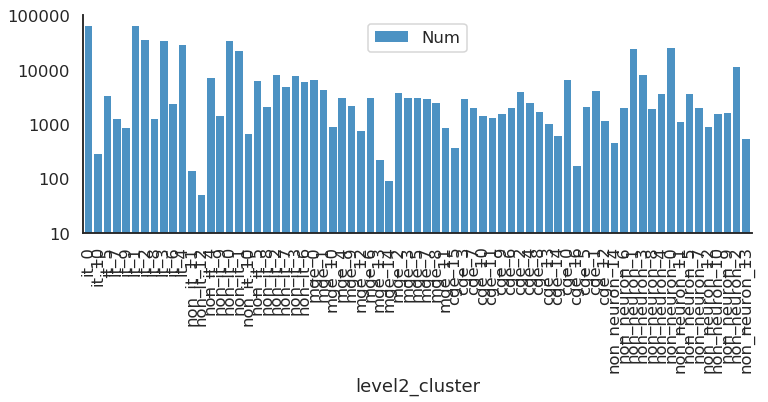

In [20]:
f = '/cndd2/fangming/projects/miniatlas/results/figures/liger_bar.pdf'

with sns.axes_style('white', {"patch.edgecolor": "black", 'patch.force_edgecolor': False,}):
    fig, ax = plt.subplots(figsize=(12, 4))
    to_plot.plot.bar(
        width=0.8,
        alpha=0.8,
        rasterized=True,
        ax=ax)
    ax.grid(False)
    sns.despine(ax=ax)
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ScalarFormat)
    ax.set_ylim([10, 10**5])
    snmcseq_utils.savefig(fig, f)
    plt.show()

In [60]:
_x = df_liger.groupby(['level1_cluster', 'level2_cluster']).size().unstack().fillna(0).astype(int)
_x = _x.divide(_x.sum(axis=0), axis=1)
_x.max(axis=0)

level2_cluster
cge_0        0.996072
cge_1        0.986295
cge_10       0.997840
cge_11       0.909304
cge_12       0.774363
cge_13       1.000000
cge_14       0.983740
cge_15       0.337912
cge_16       0.279762
cge_2        0.948002
cge_3        0.993130
cge_4        0.819679
cge_5        0.898626
cge_6        0.923924
cge_7        0.985427
cge_8        0.981754
cge_9        0.996757
it_0         0.891329
it_1         0.873443
it_10        0.472924
it_2         0.791936
it_3         0.792278
it_4         0.944483
it_5         0.906984
it_6         0.498063
it_7         0.195513
it_8         0.512882
it_9         0.617021
mge_0        0.994323
mge_1        0.862189
mge_10       0.919010
mge_11       0.983852
mge_12       0.955764
mge_13       0.563636
mge_14       0.835165
mge_2        0.931770
mge_3        0.951251
mge_4        0.912901
mge_5        0.718709
mge_6        0.952349
mge_7        0.649055
mge_8        0.980033
mge_9        0.957914
non_it_0     0.534547
non_it_1     0.66

In [61]:
_x = df_liger.groupby(['level1_cluster', 'level2_cluster']).size().unstack().fillna(0).astype(int).idxmax(axis=0)
_x.to_frame('parent_cluster')

,parent_cluster
level2_cluster,
cge_0,10
cge_1,10
cge_10,8
cge_11,16
cge_12,16
cge_13,16
cge_14,10
cge_15,18
cge_16,10


### matching cell name from 3 results

In [25]:
print(df_liger.shape)
df_liger.head()

(408736, 7)


,cell,level1_UMAP_1,level1_UMAP_2,level2_UMAP_1,level2_UMAP_2,level1_cluster,level2_cluster
0,SM-GE653_S113_E1-50,-3.164615,12.190200,4.718955,-2.380108,10,cge_5
1,SM-GE653_S114_E1-50,-9.089811,12.264736,3.001604,-9.596038,10,cge_1
2,SM-GE653_S115_E1-50,-6.619485,12.011913,6.698345,-8.710461,10,cge_1
3,SM-GE653_S116_E1-50,-3.970207,12.337406,5.894161,-5.149589,10,cge_1
4,SM-GE653_S117_E1-50,-3.395991,11.764448,2.380869,-2.322626,10,cge_5


In [26]:
print(df_rna.shape)
df_rna.head()

(294332, 5)


,x,modality_allen,cell,modality,cell_id
10X_cells_v2_AIBS.AAACCTGAGAAGGACA-5L8TX_171026_01_G04,7,10X_cells_v2_AIBS,AAACCTGAGAAGGACA-5L8TX_171026_01_G04,10x_cells_v2,10x_cells_v2_AAACCTGAGAAGGACA-5L8TX_171026_01_G04
10X_cells_v2_AIBS.AAACCTGAGACTAAGT-10L8TX_171026_01_A04,62,10X_cells_v2_AIBS,AAACCTGAGACTAAGT-10L8TX_171026_01_A04,10x_cells_v2,10x_cells_v2_AAACCTGAGACTAAGT-10L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGAGAGACTTA-12L8TX_171026_01_D05,7,10X_cells_v2_AIBS,AAACCTGAGAGACTTA-12L8TX_171026_01_D05,10x_cells_v2,10x_cells_v2_AAACCTGAGAGACTTA-12L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGAGAGGTTAT-15L8TX_171026_01_G05,63,10X_cells_v2_AIBS,AAACCTGAGAGGTTAT-15L8TX_171026_01_G05,10x_cells_v2,10x_cells_v2_AAACCTGAGAGGTTAT-15L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGAGAGTCTGG-16L8TX_171026_01_H05,70,10X_cells_v2_AIBS,AAACCTGAGAGTCTGG-16L8TX_171026_01_H05,10x_cells_v2,10x_cells_v2_AAACCTGAGAGTCTGG-16L8TX_171026_01...


In [27]:
shared_liger_rna = np.intersect1d(df_liger['cell'].values, df_rna['cell'].values)
print(shared_liger_rna.shape)
shared_liger_rna

(292723,)


array(['AAACCCAAGACATAAC-2L8TX_181211_01_H12',
       'AAACCCAAGAGAGCAA-5L8TX_181211_01_C01',
       'AAACCCAAGAGGCTGT-9L8TX_190430_01_A08', ...,
       'pBICCNsMMrMOpRPiM008d190320_TTTGTTGTCGCGGACT',
       'pBICCNsMMrMOpRPiM008d190320_TTTGTTGTCGGTAACT',
       'pBICCNsMMrMOpRPiM008d190320_TTTGTTGTCTCATTAC'], dtype=object)

In [28]:
# df.head()
df_rna['modality'].value_counts().sort_index()

10x_cells_v2             101589
10x_cells_v3              54647
10x_nuclei_v3             35809
10x_nuclei_v3_macosko     91140
smarter_cells              5609
smarter_nuclei             5538
Name: modality, dtype: int64

In [29]:
df_rna.set_index('cell').reindex(shared_liger_rna)['modality'].value_counts().sort_index()

10x_cells_v2             101573
10x_cells_v3              54593
10x_nuclei_v3             35797
10x_nuclei_v3_macosko     89626
smarter_cells              5600
smarter_nuclei             5534
Name: modality, dtype: int64

In [30]:
df_liger.head()

,cell,level1_UMAP_1,level1_UMAP_2,level2_UMAP_1,level2_UMAP_2,level1_cluster,level2_cluster
0,SM-GE653_S113_E1-50,-3.164615,12.190200,4.718955,-2.380108,10,cge_5
1,SM-GE653_S114_E1-50,-9.089811,12.264736,3.001604,-9.596038,10,cge_1
2,SM-GE653_S115_E1-50,-6.619485,12.011913,6.698345,-8.710461,10,cge_1
3,SM-GE653_S116_E1-50,-3.970207,12.337406,5.894161,-5.149589,10,cge_1
4,SM-GE653_S117_E1-50,-3.395991,11.764448,2.380869,-2.322626,10,cge_5


In [31]:
def plot_5_version2( 
           output='',
          ):
    ny = 2
    nx = 1
    heatmap_kws = {
        'xticklabels': False, 
        'yticklabels': False,
        'vmin': 0, 
        'vmax': 1,
        'cmap': 'Reds',
    }

    cbar_kws = {
        'orientation': 'vertical', 
        'label': 'Fraction of cells',
    }

    with sns.plotting_context('talk'):
        fig, axs = plt.subplots(ny, nx, figsize=(3*nx, 3*ny))
        axs = axs.T
        ax = axs
        cbar_ax = fig.add_axes([0.95, 0.4, 0.03, 0.3])
        njoint_clusters = len(Y['cluster'].unique())
        i = 0
        conf_mat = pd.crosstab(X['cluster'].values, 
                               Y['cluster'].values,
                              ) #.fillna(0)
        # normalize each joint cluster
        conf_mat_njoint = conf_mat.divide(conf_mat.sum(axis=0), axis=1)
        # normalize each orig cluster
        conf_mat_norig = conf_mat.divide(conf_mat.sum(axis=1), axis=0)

        # plot normalized by joint 
        if i == 0:
            ylabel = 'RNA integration\n{} clusters\n(row norm)'.format(njoint_clusters)
            cbar = True
        else:
            ylabel = ''
            cbar = False
            
#         _X = conf_mat_njoint.reindex(order_joint, axis=1, fill_value=0) 
        _X = conf_mat_njoint #(fill_value=0)
        _rX, ri, rc = snmcseq_utils.diag_matrix_rows(_X.values, _X.index.values, _X.columns.values)
        _rX = pd.DataFrame(_rX, index=ri, columns=rc)
        g = sns.heatmap(_rX.T, 
                    cbar=cbar,
                    cbar_kws=cbar_kws,
                    cbar_ax=cbar_ax,
                    ax=ax[0],
                    **heatmap_kws,
                   )
        g.axes.set_title('{}\n{} clusters'.format(
            'All integration',
            _rX.shape[0]))
        g.axes.set_ylabel(ylabel)
        order_orig = _rX.index.values # Will be fixed for the mod clusters  
        # bounding box
        for _, spine in g.axes.spines.items():
            spine.set_visible(True)
#             spine.set_color(settings[mod].color)

        # plot normalized by orig (according to the axis of normalized by joint) 
        _X = conf_mat_norig.reindex(order_orig, axis=0).fillna(0)
        g = sns.heatmap(_X.T, 
                    cbar=False,
                    ax=ax[1],
                    **heatmap_kws,
                   )
        if i == 0:
            g.axes.set_xlabel('')
            g.axes.set_ylabel('RNA integration\n{} clusters\n(col norm)'.format(njoint_clusters))
        else:
            g.axes.set_xlabel('')
            g.axes.set_ylabel('')
        # bounding box
        for _, spine in g.axes.spines.items():
            spine.set_visible(True)
#             spine.set_color(settings[mod].color)

        plt.subplots_adjust(hspace=0.05, wspace=0.05)
        if output:
            fig.savefig(output, bbox_inches='tight')
        plt.show()
     

### Compare LIGER vs RNA 

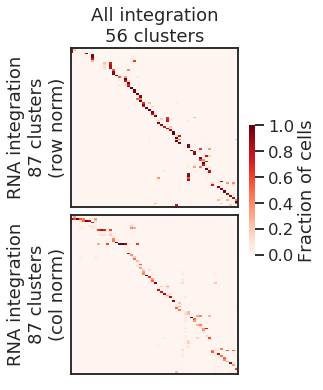

In [32]:
X = df_liger.set_index('cell').reindex(shared_liger_rna)[['level2_cluster']].rename(columns={'level2_cluster': 'cluster'})
Y = df_rna.set_index('cell').reindex(shared_liger_rna)[['x']].rename(columns={'x': 'cluster'})
Y['cluster']= Y['cluster'].apply(lambda x: df_rna_annot.loc[x, 'cluster_label'])
plot_5_version2()

### Show more details

In [33]:
def plot_5_version3( 
            mod_x, mod_y,
           output='',
          ):
    ny = 2
    nx = 1
    heatmap_kws = {
        'xticklabels': True, 
        'yticklabels': True,
        'vmin': 0, 
        'vmax': 1,
        'cmap': 'Reds',
    }

    cbar_kws = {
        'orientation': 'vertical', 
        'label': 'Fraction of cells',
    }

    with sns.plotting_context('talk'):
        fig, axs = plt.subplots(ny, nx, figsize=(11*nx, 10*ny))
        axs = axs.T
        ax = axs
        cbar_ax = fig.add_axes([0.97, 0.4, 0.03, 0.3])
        njoint_clusters = len(Y['cluster'].unique())
        i = 0
        conf_mat = pd.crosstab(X['cluster'].values, 
                               Y['cluster'].values,
                              )
        # normalize each joint cluster
        conf_mat_njoint = conf_mat.divide(conf_mat.sum(axis=0), axis=1)
        # normalize each orig cluster
        conf_mat_norig = conf_mat.divide(conf_mat.sum(axis=1), axis=0)

        # plot normalized by joint 
        if i == 0:
            ylabel = '{}\n{} clusters\n(row norm)'.format(mod_y, njoint_clusters)
            cbar = True
        else:
            ylabel = ''
            cbar = False
            
#         _X = conf_mat_njoint.reindex(order_joint, axis=1, fill_value=0) 
        _X = conf_mat_njoint #(fill_value=0)
        _rX, ri, rc = snmcseq_utils.diag_matrix_rows(_X.values, _X.index.values, _X.columns.values)
        _rX = pd.DataFrame(_rX, index=ri, columns=rc)
        g = sns.heatmap(_rX.T, 
                    cbar=cbar,
                    cbar_kws=cbar_kws,
                    cbar_ax=cbar_ax,
                    ax=ax[0],
                    **heatmap_kws,
                   )
        g.axes.set_title('{}\n{} clusters'.format(
            mod_x,
            _rX.shape[0]))
        g.axes.set_ylabel(ylabel)
        g.axes.set_xticklabels(g.axes.get_xticklabels(), fontsize=8)
        g.axes.set_yticklabels(g.axes.get_yticklabels(), fontsize=8)
        order_orig = _rX.index.values # Will be fixed for the mod clusters  
        # bounding box
        for _, spine in g.axes.spines.items():
            spine.set_visible(True)
#             spine.set_color(settings[mod].color)

        # plot normalized by orig (according to the axis of normalized by joint) 
        _X = conf_mat_norig.reindex(order_orig, axis=0).fillna(0)
        g = sns.heatmap(_X.T, 
                    cbar=False,
                    ax=ax[1],
                    **heatmap_kws,
                   )
        if i == 0:
            g.axes.set_xlabel('')
            g.axes.set_ylabel('RNA integration\n{} clusters\n(col norm)'.format(njoint_clusters))
        else:
            g.axes.set_xlabel('')
            g.axes.set_ylabel('')
        # bounding box
        for _, spine in g.axes.spines.items():
            spine.set_visible(True)
#             spine.set_color(settings[mod].color)
        g.axes.set_xticklabels(g.axes.get_xticklabels(), fontsize=8)
        g.axes.set_yticklabels(g.axes.get_yticklabels(), fontsize=8)
        
        plt.subplots_adjust(hspace=0.05, wspace=0.05)
        fig.tight_layout()
        if output:
            fig.savefig(output, bbox_inches='tight')
        plt.show()
     

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


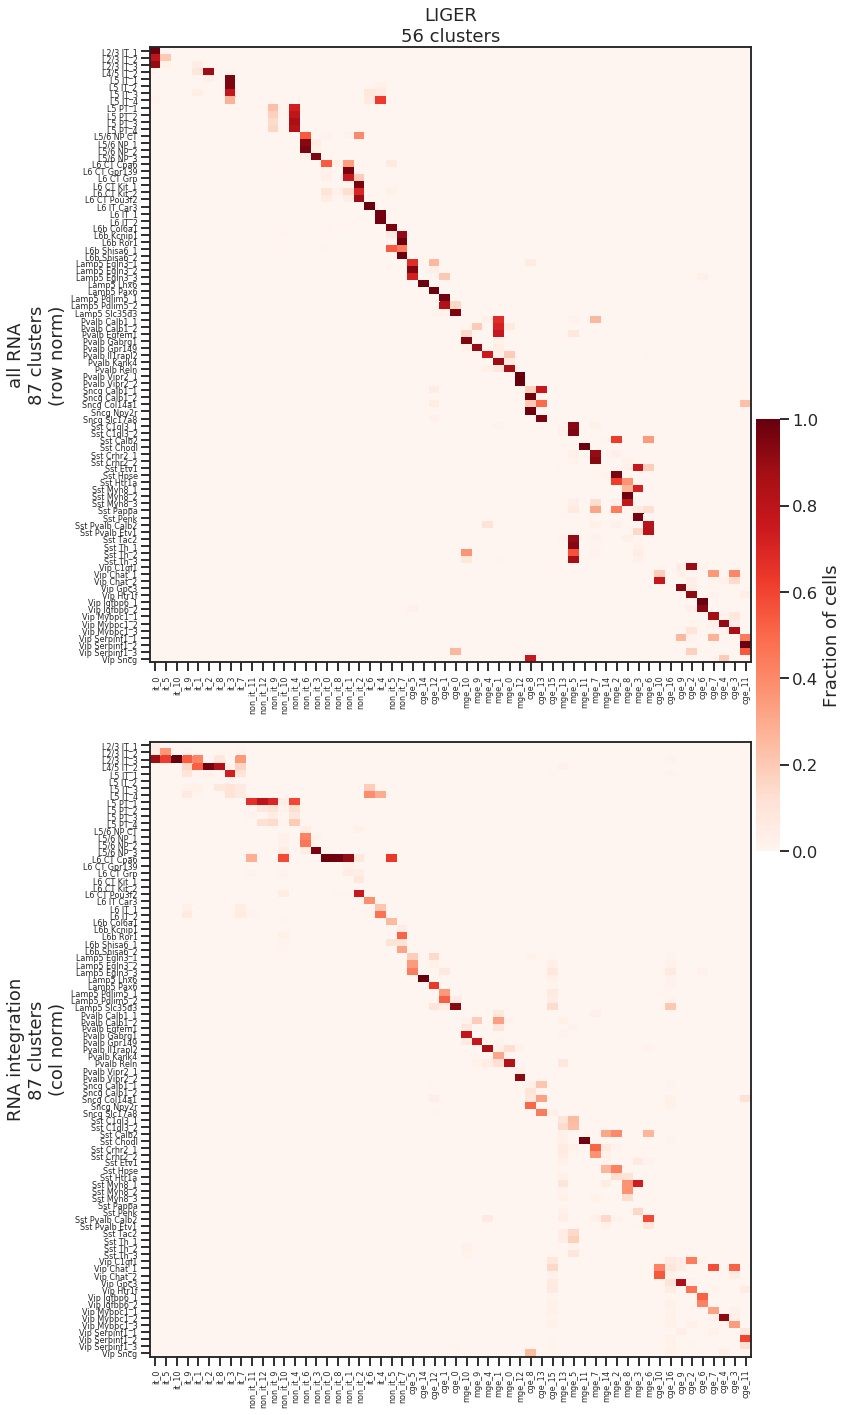

In [34]:
X = df_liger.set_index('cell').reindex(shared_liger_rna)[['level2_cluster']].rename(columns={'level2_cluster': 'cluster'})
Y = df_rna.set_index('cell').reindex(shared_liger_rna)[['x']].rename(columns={'x': 'cluster'})
Y['cluster']= Y['cluster'].apply(lambda x: df_rna_annot.loc[x, 'cluster_label'])

output = '/cndd/fangming/CEMBA/data/MOp_all/results/LIGER_RNA_comparison.pdf'
plot_5_version3('LIGER', 'all RNA', output)

### Annotate LIGER results

In [35]:
conf_mat = pd.crosstab(X['cluster'].values, 
                       Y['cluster'].values,
                      )
# normalize each joint cluster
conf_mat_njoint = conf_mat.divide(conf_mat.sum(axis=0), axis=1)
# normalize each orig cluster
conf_mat_norig = conf_mat.divide(conf_mat.sum(axis=1), axis=0)

In [36]:
df_rna_annot.head()

,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,cl,cluster_size,size,tree_order
cluster_id,,,,,,,,,,,,
1,Lamp5 Pax6,#DDACC9,1,Lamp5,#DA808C,1,GABAergic,#F05A28,1,700,700,1
2,Lamp5 Egln3_1,#FF88AD,1,Lamp5,#DA808C,1,GABAergic,#F05A28,2,618,618,2
3,Lamp5 Egln3_2,#DD8091,1,Lamp5,#DA808C,1,GABAergic,#F05A28,3,814,814,3
4,Lamp5 Egln3_3,#F08E98,1,Lamp5,#DA808C,1,GABAergic,#F05A28,4,1276,1276,4
5,Lamp5 Pdlim5_1,#FF7290,1,Lamp5,#DA808C,1,GABAergic,#F05A28,5,1288,1288,5


In [46]:
liger_annot = conf_mat_norig.T.idxmax().to_frame('annot').reset_index()
liger_annot = pd.merge(liger_annot, df_rna_annot[['cluster_label', 'cluster_color']], left_on='annot', right_on='cluster_label').drop('cluster_label', axis=1).set_index('cluster')
liger_annot

,annot,cluster_color
cluster,,
cge_0,Lamp5 Slc35d3,#FFA388
cge_16,Lamp5 Slc35d3,#FFA388
cge_1,Lamp5 Pdlim5_2,#FF8C97
cge_10,Vip Chat_2,#B3128A
cge_11,Vip Serpinf1_2,#AB1DFF
cge_12,Lamp5 Pax6,#DDACC9
cge_13,Sncg Slc17a8,#9440F3
cge_14,Lamp5 Lhx6,#C77963
cge_15,Vip Chat_1,#FF00FF


In [47]:
# liger_annot = conf_mat_norig.T.idxmax().to_frame('annot')
# liger_annot['color'] = df_rna_annot.set_index('cluster_label').loc[liger_annot['annot'].values, 'cluster_color'].values
# liger_annot.index.name = 'cluster'
# print(liger_annot.shape)
# liger_annot.head()

In [48]:
df_liger = pd.merge(df_liger, liger_annot, left_on='level2_cluster', right_on='cluster')
print(df_liger.shape)
df_liger.head()

(408736, 9)


,cell,level1_UMAP_1,level1_UMAP_2,level2_UMAP_1,level2_UMAP_2,level1_cluster,level2_cluster,annot,cluster_color
0,SM-GE653_S113_E1-50,-3.164615,12.190200,4.718955,-2.380108,10,cge_5,Lamp5 Egln3_3,#F08E98
1,SM-GE653_S117_E1-50,-3.395991,11.764448,2.380869,-2.322626,10,cge_5,Lamp5 Egln3_3,#F08E98
2,SM-GE653_S118_E1-50,-2.278710,12.773043,6.417862,-1.314918,8,cge_5,Lamp5 Egln3_3,#F08E98
3,SM-GE653_S120_E1-50,-2.899099,12.395375,5.662322,-2.015199,10,cge_5,Lamp5 Egln3_3,#F08E98
4,SM-GE653_S122_E1-50,-3.567551,11.620143,2.055580,-3.102450,10,cge_5,Lamp5 Egln3_3,#F08E98


In [49]:
dirc = '/cndd/fangming/CEMBA/data/MOp_all/josh_welch'
with snmcseq_utils.cd(dirc):
    f = 'LIGER_neuron_organized_annot_FX2.tsv'
    liger_annot.to_csv(f, sep='\t', header=True, index=True)
    f = 'LIGER_neuron_organized_FX2.tsv'
    df_liger.to_csv(f, sep='\t', header=True, index=False)




#     f = 'LIGER_non_neuron_organized_annot_FX2.tsv'
#     liger_annot.to_csv(f, sep='\t', header=True, index=True)
#     f = 'LIGER_non_neuron_organized_FX2.tsv'
#     df_liger2.to_csv(f, sep='\t', header=True, index=False)

In [64]:
# df_liger
df_rna.head()

,x,modality_allen,cell,modality,cell_id
10X_cells_v2_AIBS.AAACCTGCAATGCCAT-8L8TX_171026_01_A05,93,10X_cells_v2_AIBS,AAACCTGCAATGCCAT-8L8TX_171026_01_A05,10x_cells_v2,10x_cells_v2_AAACCTGCAATGCCAT-8L8TX_171026_01_A05
10X_cells_v2_AIBS.AAACCTGGTCGCATAT-14L8TX_171026_01_F05,100,10X_cells_v2_AIBS,AAACCTGGTCGCATAT-14L8TX_171026_01_F05,10x_cells_v2,10x_cells_v2_AAACCTGGTCGCATAT-14L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGGTGGAAAGA-8L8TX_171026_01_A05,113,10X_cells_v2_AIBS,AAACCTGGTGGAAAGA-8L8TX_171026_01_A05,10x_cells_v2,10x_cells_v2_AAACCTGGTGGAAAGA-8L8TX_171026_01_A05
10X_cells_v2_AIBS.AAACCTGGTGGTTTCA-13L8TX_171026_01_E05,113,10X_cells_v2_AIBS,AAACCTGGTGGTTTCA-13L8TX_171026_01_E05,10x_cells_v2,10x_cells_v2_AAACCTGGTGGTTTCA-13L8TX_171026_01...
10X_cells_v2_AIBS.AAACCTGGTTCGTGAT-5L8TX_171026_01_G04,100,10X_cells_v2_AIBS,AAACCTGGTTCGTGAT-5L8TX_171026_01_G04,10x_cells_v2,10x_cells_v2_AAACCTGGTTCGTGAT-5L8TX_171026_01_G04


In [72]:
# modalities

dfs = []
for file in glob.glob('/cndd/fangming/CEMBA/data/MOp_all/data_freeze_formatted/*_metadata.tsv'):
    mod = file.split('/')[-1][:-len('_metadata.tsv')]
    df = pd.read_csv(file, sep='\t', index_col=0)
    df['modality'] = mod 
    df = df[['modality']]
    dfs.append(df)
    print(df.shape)
#     print(df.head())
dfs = pd.concat(dfs)
print(dfs.shape)
dfs['modality'].unique()
    
    

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(6288, 1)
(6171, 1)
(40166, 1)
(159738, 1)
(71183, 1)
(9876, 1)
(122641, 1)
(81196, 1)
(497259, 1)


array(['smarter_cells', 'smarter_nuclei', '10x_nuclei_v3',
       '10x_nuclei_v3_macosko', '10x_cells_v3', 'snmcseq_gene',
       '10x_cells_v2', 'snatac_gene'], dtype=object)

In [84]:
# df_liger.head()
for mod, df_sub in dfs.groupby('modality'):
    print(mod)
    print(df_sub.index.values[:5])

10x_cells_v2
['AAACCTGAGGAGTCTG-1L8TX_171026_01_F03'
 'ACCTTTAGTACAGCAG-1L8TX_171026_01_F03'
 'ACGATACCACCCAGTG-1L8TX_171026_01_F03'
 'ACGGGTCAGTGGGCTA-1L8TX_171026_01_F03'
 'AGCAGCCCAGTTCATG-1L8TX_171026_01_F03']
10x_cells_v3
['AAACCCAAGCTTCATG-1L8TX_181211_01_G12'
 'AAACCCACACCAGCCA-1L8TX_181211_01_G12'
 'AAACGAACAACGATTC-1L8TX_181211_01_G12'
 'AAACGAATCTCGTGAA-1L8TX_181211_01_G12'
 'AAACGCTGTAGTCACT-1L8TX_181211_01_G12']
10x_nuclei_v3
['AAACCCAAGCTCTTCC-1L8TX_181211_01_A02'
 'AAAGGGCTCGCGATCG-1L8TX_181211_01_A02'
 'AAAGTGACATCGCTGG-1L8TX_181211_01_A02'
 'AACAACCGTGCTCTCT-1L8TX_181211_01_A02'
 'AACAAGAAGCCTGCCA-1L8TX_181211_01_A02']
10x_nuclei_v3_macosko
['pBICCNsMMrMOpRMiM003d190318_AAACCCACACAAGCTT'
 'pBICCNsMMrMOpRMiM003d190318_AAAGGATCAGACCGCT'
 'pBICCNsMMrMOpRMiM003d190318_AAAGGATCATGGAACG'
 'pBICCNsMMrMOpRMiM003d190318_AAAGGTAGTAATACCC'
 'pBICCNsMMrMOpRMiM003d190318_AAAGTCCCAAGGTCAG']
smarter_cells
['LS-15395_S41_E1-50' 'LS-15395_S42_E1-50' 'LS-15501_S28_E1-50'
 'LS-15501_S81_E

In [87]:
print(df_liger.shape)
# df_liger2 = pd.merge(df_liger, dfs, left_on='cell', right_index=True, how='left')
df_liger2 = pd.merge(df_liger, dfs, left_on='cell', right_index=True)
print(df_liger2.shape)

(87143, 6)
(86293, 7)


In [80]:
df_liger2['modality'].value_counts()

10x_nuclei_v3_macosko    58091
snatac_gene              24781
10x_cells_v3              1456
10x_cells_v2              1201
10x_nuclei_v3              460
smarter_nuclei             260
smarter_cells               44
Name: modality, dtype: int64

In [83]:
df_liger2[df_liger2['modality'].isnull()]

,cell,UMAP_1,UMAP_2,level2_cluster,annot,color,modality
16844,AAAGTAGCATGGTAGG-1L8TX_180301_01_A06,-5.039504,3.406263,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16845,AACACGTCAGCGAACA-1L8TX_180301_01_A06,-5.274236,3.615941,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16846,AAGGAGCAGCCTATGT-1L8TX_180301_01_A06,-2.252980,5.776957,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16847,AAGGAGCCAGGTCGTC-1L8TX_180301_01_A06,-5.981062,4.223097,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16848,ACCGTAACATTGCGGC-1L8TX_180301_01_A06,-4.823272,2.634495,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16849,ACGATACAGGGTTTCT-1L8TX_180301_01_A06,-3.271664,1.725224,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16850,AGAATAGTCTCCAACC-1L8TX_180301_01_A06,-3.350474,1.228973,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16851,AGACGTTTCGATGAGG-1L8TX_180301_01_A06,-5.173074,5.558912,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16852,AGAGCGATCCGAAGAG-1L8TX_180301_01_A06,-4.165503,1.735429,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
16853,AGATCTGAGTGCCAGA-1L8TX_180301_01_A06,-3.513564,1.711866,non_neuron_0,Oligo Opalin_2,#6CA491,NaN
